In [700]:
import pandas as pd
import numpy as np
import spotipy
import time
import seaborn as sns
import matplotlib.pyplot as plt
from spotipy.oauth2 import SpotifyClientCredentials

%matplotlib inline

In [701]:
client_id = '4f01cd79c3f046988b6fb8049091f711'
client_secret = ##

In [702]:
client_credentials = SpotifyClientCredentials(client_id,client_secret)

In [703]:
sp = spotipy.Spotify(client_credentials_manager = client_credentials)

In [5]:
playlist_id = '37i9dQZF1DX8Kgdykz6OKj' #Rap jazz playlist

In [6]:
tracks =sp.playlist(playlist_id = playlist_id)

In [7]:
track_2 = sp.user_playlist_tracks(playlist_id = playlist_id , limit =100,offset = 100)

In [8]:
track_2.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [9]:
number_of_music = len(tracks['tracks']['items'])

In [10]:
for i,l in list(enumerate(tracks['tracks']['items'])):
    print(l['track']['name']) #Getting the names

The Process
Dusty
Jigsaw
Crazy
Alchemy
Drive Slow
THE WORD
MAYA
Eucalyptus
Dream Blvd
Happiness Is
Careful
Mirrors
Everybody's Somebody
Hi(gh)
I Ain't Finished Yet
No Peace
Trick Questions
Go So Far
We Do It (Jazz Spastiks Remix)
Cookie Chips
Open - Remix (feat. Blu)
Sunlit Days
Do Me That Favor
What U Need
Laid Back
Inside Story
Somethings Happening
POETRY JAM (feat. Foggieraw)
The Stars My Destination
Politickin
Tulips
Free Your Mind
Bittersweet Baby
Anything
Jazz & Coffee, Pt. 4
Patek
Black Is Beautiful
Same Old Me
Phone Won't Charge
Chase It
Burnt Out
Get What's Yours
Guidelines
Hunnid (feat. Joyce Wrice)
Out Of My Hands (feat. Oddisee)
Lonely
Dreamchaser
Standing There
Irreversible
Searching
Terrapin
Live & Direct - Live
Da Funk - Remix
Flowers On The Weekend
Watching You
Blessings
Haze
Carefree
Record Store (feat. J-Live)
That Love - Radio Version
Eve
Bionic Muscle
Different People
Elephant Rome
Once Upon a Time
Brain
Clip Your Wings
Blue Skies
God
Flashback
Down
Any Way, Any Day

In [11]:
artist_name,track_name,popularity,track_id,date = [],[],[],[],[]

In [12]:
for i in range(0,number_of_music,number_of_music):
    for j,l in enumerate(tracks['tracks']['items']):
        artist_name.append(l['track']['artists'][0]['name'])
        date.append(l['added_at'])
        track_name.append(l['track']['name'])
        popularity.append(l['track']['popularity'])
        track_id.append(l['track']['id'])

In [13]:
track_df = pd.DataFrame({
    'artist_name':artist_name,
    'track_name': track_name,
    'popularity' : popularity,
    'track_id' : track_id,
    'date':date
})

In [14]:
track_df.shape

(100, 5)

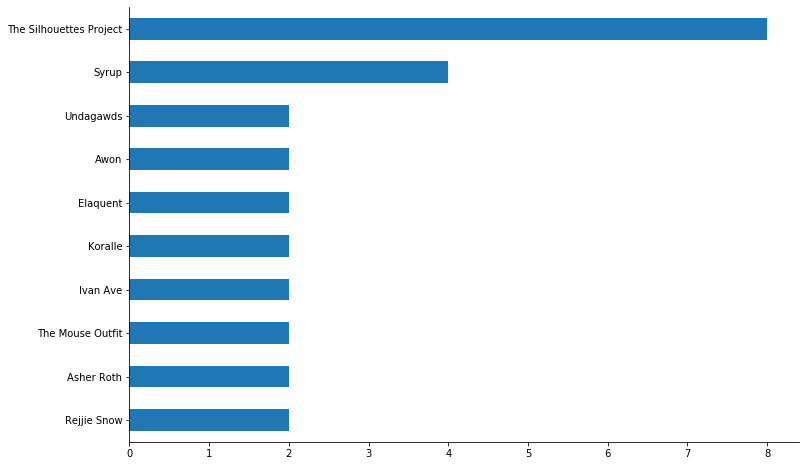

In [15]:
plt.figure(figsize = (12,8))
(track_df
 .artist_name
 .value_counts(ascending = True)
 .loc[lambda x: x > 1]
 .plot.barh()
)
sns.despine()

In [16]:
features = sp.audio_features(track_df['track_id'])

In [17]:
features_name = list(features[0].keys())

In [18]:
feature_list = {}
for i in features_name:
    feature_list[i] = list()

In [19]:
danceability = []

In [20]:
danceability

[]

In [21]:
feature_list

{'danceability': [],
 'energy': [],
 'key': [],
 'loudness': [],
 'mode': [],
 'speechiness': [],
 'acousticness': [],
 'instrumentalness': [],
 'liveness': [],
 'valence': [],
 'tempo': [],
 'type': [],
 'id': [],
 'uri': [],
 'track_href': [],
 'analysis_url': [],
 'duration_ms': [],
 'time_signature': []}

In [22]:
list_serie_creator = [lambda x: list(x)]

In [23]:
for i,l in enumerate(features):
    for key in feature_list.keys():
        feature_list[key].append(l[key])

In [24]:
track_df_full = track_df.join(pd.DataFrame(feature_list))

In [25]:
track_df_full.drop(['track_id'], axis =1,inplace = True)

In [26]:
track_df_full.drop(['id','uri','track_href','analysis_url'], axis =1,inplace = True)

In [27]:
pd.set_option('display.max_rows',100)

In [28]:
track_df_full

,artist_name,track_name,popularity,date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
0,The Silhouettes Project,The Process,18,2020-11-30T11:49:32Z,0.564,0.332,10,-14.700,0,0.3390,0.40700,0.000790,0.4430,0.205,82.744,audio_features,227213,4
1,Thelonious Coltrane,Dusty,31,2020-11-30T11:49:32Z,0.737,0.479,2,-11.347,1,0.1070,0.00389,0.000126,0.1030,0.335,120.066,audio_features,145009,4
2,The Primeridian,Jigsaw,28,2020-11-30T11:49:32Z,0.802,0.877,1,-6.477,1,0.2470,0.11700,0.000000,0.4840,0.540,94.200,audio_features,252200,4
3,Genra,Crazy,37,2020-11-30T11:49:32Z,0.565,0.881,6,-2.962,0,0.3530,0.58300,0.000000,0.1140,0.776,92.824,audio_features,156522,4
4,MANIK MC,Alchemy,44,2020-11-30T11:49:32Z,0.677,0.221,3,-11.004,0,0.3090,0.82700,0.000011,0.1100,0.561,89.905,audio_features,193362,4
5,Nix Northwest,Drive Slow,47,2020-11-30T11:49:32Z,0.486,0.441,6,-14.647,1,0.3130,0.33700,0.000004,0.1140,0.195,89.024,audio_features,221333,4
6,Jay Prince,THE WORD,41,2020-11-30T11:49:32Z,0.391,0.612,8,-8.569,0,0.1340,0.57900,0.000002,0.1030,0.515,80.751,audio_features,232476,4
7,PRICE,MAYA,50,2020-11-30T11:49:32Z,0.577,0.687,3,-7.393,0,0.1270,0.07160,0.000000,0.5460,0.775,76.477,audio_features,181579,4
8,The Silhouettes Project,Eucalyptus,32,2020-11-30T11:49:32Z,0.545,0.348,8,-16.530,1,0.1720,0.60600,0.017000,0.0935,0.346,88.910,audio_features,213533,4
9,Bei Ru,Dream Blvd,31,2020-11-30T11:49:32Z,0.458,0.527,9,-10.254,1,0.2000,0.76500,0.000000,0.1280,0.570,85.526,audio_features,123500,4


In [29]:
#Let's compare lo-fi playlist vs Beats_to_think playlist

In [30]:
#Why is lofi more relaxing and the beats to think gives me more ability to fcous ? 

In [31]:
#Comparing a jazz playlist and lo-fi both have relaxing effect on me, why ? 

In [704]:
lofi_id ='37i9dQZF1DWWQRwui0ExPn' 

In [715]:
tracks_lofi = sp.user_playlist_tracks(playlist_id = lofi_id)

In [34]:
tracks_lofi['items'][10]['track']['artists'][0]['name']

'Yessam'

In [35]:
track_name,artist_name,date_added,popularity,id_feat = [],[],[],[],[]

In [36]:
n = len(tracks_lofi['items'])

In [37]:
for i in range(n):
    track_name.append(tracks_lofi['items'][i]['track']['name'])
    artist_name.append(tracks_lofi['items'][i]['track']['artists'][0]['name'])
    date_added.append(tracks_lofi['items'][i]['added_at'])
    popularity.append(tracks_lofi['items'][i]['track']['popularity'])
    id_feat.append(tracks_lofi['items'][i]['track']['id'])
    
    

In [38]:
popularity

[56,
 57,
 56,
 45,
 58,
 42,
 39,
 48,
 56,
 43,
 44,
 43,
 43,
 41,
 31,
 45,
 45,
 46,
 49,
 61,
 49,
 58,
 54,
 43,
 51,
 58,
 54,
 45,
 59,
 59,
 46,
 60,
 55,
 58,
 55,
 50,
 57,
 46,
 59,
 53,
 58,
 45,
 59,
 45,
 59,
 48,
 57,
 58,
 58,
 57,
 49,
 58,
 45,
 54,
 56,
 55,
 57,
 45,
 57,
 58,
 50,
 44,
 45,
 55,
 54,
 56,
 43,
 54,
 48,
 59,
 46,
 48,
 55,
 49,
 54,
 45,
 55,
 52,
 55,
 55,
 50,
 58,
 52,
 56,
 48,
 55,
 51,
 47,
 47,
 56,
 56,
 56,
 53,
 59,
 53,
 48,
 50,
 51,
 52,
 61]

In [739]:
features_lofi = sp.audio_features(id_feat)

In [40]:
track_lofi = pd.DataFrame({
    'artist_name' : artist_name,
    'track_name' : track_name,
    'date' : date_added,
    'popularity' : popularity
    
})

In [41]:
track_lofi.index

RangeIndex(start=0, stop=100, step=1)

In [42]:
data_lofi = track_lofi.join(pd.DataFrame(features_lofi))

In [43]:
data_lofi

,artist_name,track_name,date,popularity,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Lehiotik,Prey,2020-11-25T01:56:30Z,56,0.417,0.1840,9,-13.227,0,0.0579,...,0.1510,0.0372,119.832,audio_features,10XX9bqEN46ZISDX07ahQF,spotify:track:10XX9bqEN46ZISDX07ahQF,https://api.spotify.com/v1/tracks/10XX9bqEN46Z...,https://api.spotify.com/v1/audio-analysis/10XX...,86125,3
1,aesvec.,I Don't Care,2020-11-25T01:56:30Z,57,0.710,0.1930,0,-16.519,0,0.0747,...,0.1150,0.1520,80.062,audio_features,1o6cDsvkbZ4riUNoczuBaX,spotify:track:1o6cDsvkbZ4riUNoczuBaX,https://api.spotify.com/v1/tracks/1o6cDsvkbZ4r...,https://api.spotify.com/v1/audio-analysis/1o6c...,121510,4
2,braj mahal,Crush,2020-11-25T01:56:30Z,56,0.841,0.4290,5,-6.940,1,0.1610,...,0.2210,0.7240,79.022,audio_features,5LInpL87GTv98Uur64L3D6,spotify:track:5LInpL87GTv98Uur64L3D6,https://api.spotify.com/v1/tracks/5LInpL87GTv9...,https://api.spotify.com/v1/audio-analysis/5LIn...,109367,4
3,ocha,Wish We Could Stay Like This Forever,2020-11-25T01:56:30Z,45,0.658,0.3350,4,-14.835,1,0.2180,...,0.1330,0.4660,79.895,audio_features,0f0EDZUFDo8f27Dg4SmCWk,spotify:track:0f0EDZUFDo8f27Dg4SmCWk,https://api.spotify.com/v1/tracks/0f0EDZUFDo8f...,https://api.spotify.com/v1/audio-analysis/0f0E...,168000,4
4,Peter Kind,Sweet Hangover,2020-11-25T01:56:30Z,58,0.742,0.3340,1,-9.704,0,0.0680,...,0.1050,0.6150,80.008,audio_features,5kGxA8CYmy5aUAcv2zHtwj,spotify:track:5kGxA8CYmy5aUAcv2zHtwj,https://api.spotify.com/v1/tracks/5kGxA8CYmy5a...,https://api.spotify.com/v1/audio-analysis/5kGx...,112714,4
5,Tohaj,Mindfulness,2020-11-25T01:56:30Z,42,0.638,0.3800,2,-9.160,0,0.0405,...,0.0984,0.3110,79.209,audio_features,06BYSLMHmOMOr1knt53RZv,spotify:track:06BYSLMHmOMOr1knt53RZv,https://api.spotify.com/v1/tracks/06BYSLMHmOMO...,https://api.spotify.com/v1/audio-analysis/06BY...,169625,4
6,Dualizm,Going Home,2020-11-25T01:56:30Z,39,0.746,0.3140,1,-11.632,1,0.0518,...,0.0814,0.3340,85.038,audio_features,6UH10PmCGSxxNbim2paArg,spotify:track:6UH10PmCGSxxNbim2paArg,https://api.spotify.com/v1/tracks/6UH10PmCGSxx...,https://api.spotify.com/v1/audio-analysis/6UH1...,144000,4
7,twuan,Chillin',2020-11-25T01:56:30Z,48,0.642,0.1970,4,-14.052,0,0.0540,...,0.1110,0.2480,152.039,audio_features,3kY6Smy7NXcHyE7yku3ZH5,spotify:track:3kY6Smy7NXcHyE7yku3ZH5,https://api.spotify.com/v1/tracks/3kY6Smy7NXcH...,https://api.spotify.com/v1/audio-analysis/3kY6...,77241,4
8,Saib,City Lounge,2020-11-25T01:56:30Z,56,0.807,0.5760,4,-10.158,0,0.2960,...,0.1160,0.7710,169.999,audio_features,1hxcBxHHWA57B1xiDPZpNs,spotify:track:1hxcBxHHWA57B1xiDPZpNs,https://api.spotify.com/v1/tracks/1hxcBxHHWA57...,https://api.spotify.com/v1/audio-analysis/1hxc...,158118,4
9,Simple Lo-Fi,Mi Sento Bene,2020-11-25T01:56:30Z,43,0.595,0.3260,9,-14.338,0,0.0321,...,0.0926,0.0933,79.948,audio_features,0V7eihVQ0iklRQohwBlOIw,spotify:track:0V7eihVQ0iklRQohwBlOIw,https://api.spotify.com/v1/tracks/0V7eihVQ0ikl...,https://api.spotify.com/v1/audio-analysis/0V7e...,118875,4


In [44]:
col_to_drop = ['track_href','analysis_url','uri','id','type']

In [45]:
data_lofi.drop(col_to_drop,axis = 1,inplace = True)

In [46]:
data_lofi.drop('time_signature', inplace =True , axis = 1)

In [47]:
data_lofi

,artist_name,track_name,date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Lehiotik,Prey,2020-11-25T01:56:30Z,56,0.417,0.1840,9,-13.227,0,0.0579,0.910000,0.865000,0.1510,0.0372,119.832,86125
1,aesvec.,I Don't Care,2020-11-25T01:56:30Z,57,0.710,0.1930,0,-16.519,0,0.0747,0.665000,0.846000,0.1150,0.1520,80.062,121510
2,braj mahal,Crush,2020-11-25T01:56:30Z,56,0.841,0.4290,5,-6.940,1,0.1610,0.505000,0.545000,0.2210,0.7240,79.022,109367
3,ocha,Wish We Could Stay Like This Forever,2020-11-25T01:56:30Z,45,0.658,0.3350,4,-14.835,1,0.2180,0.741000,0.872000,0.1330,0.4660,79.895,168000
4,Peter Kind,Sweet Hangover,2020-11-25T01:56:30Z,58,0.742,0.3340,1,-9.704,0,0.0680,0.418000,0.019300,0.1050,0.6150,80.008,112714
5,Tohaj,Mindfulness,2020-11-25T01:56:30Z,42,0.638,0.3800,2,-9.160,0,0.0405,0.740000,0.797000,0.0984,0.3110,79.209,169625
6,Dualizm,Going Home,2020-11-25T01:56:30Z,39,0.746,0.3140,1,-11.632,1,0.0518,0.843000,0.927000,0.0814,0.3340,85.038,144000
7,twuan,Chillin',2020-11-25T01:56:30Z,48,0.642,0.1970,4,-14.052,0,0.0540,0.435000,0.823000,0.1110,0.2480,152.039,77241
8,Saib,City Lounge,2020-11-25T01:56:30Z,56,0.807,0.5760,4,-10.158,0,0.2960,0.041900,0.931000,0.1160,0.7710,169.999,158118
9,Simple Lo-Fi,Mi Sento Bene,2020-11-25T01:56:30Z,43,0.595,0.3260,9,-14.338,0,0.0321,0.968000,0.951000,0.0926,0.0933,79.948,118875


In [48]:
#Is there an artist who has more than one track in this playlist ? 

In [49]:
names_more1 = (data_lofi
 .artist_name
 .value_counts()
 .loc[lambda x : x > 1]
 .index
 .tolist()
)

In [50]:
names_more1

['Snuggles',
 'PawnShop Guy',
 'Otis Neon',
 'vibe academy',
 'really big mountains',
 'Teebs',
 'sound butler',
 'lōland']

In [51]:
#Are these artist popular more than the avergae ? 

In [52]:
average_popularity = data_lofi.popularity.mean()

In [53]:
average_popularity

51.76

In [54]:
(data_lofi
 .loc[data_lofi.artist_name.isin(names_more1),'popularity']
 .mean()
)

52.875

In [55]:
#We can see that the fact that the name appears is not correlated with the fact that the artist are good

In [56]:
#Let's draw a graph of popularity

In [57]:
std_deviation = np.sqrt(data_lofi.popularity.var())

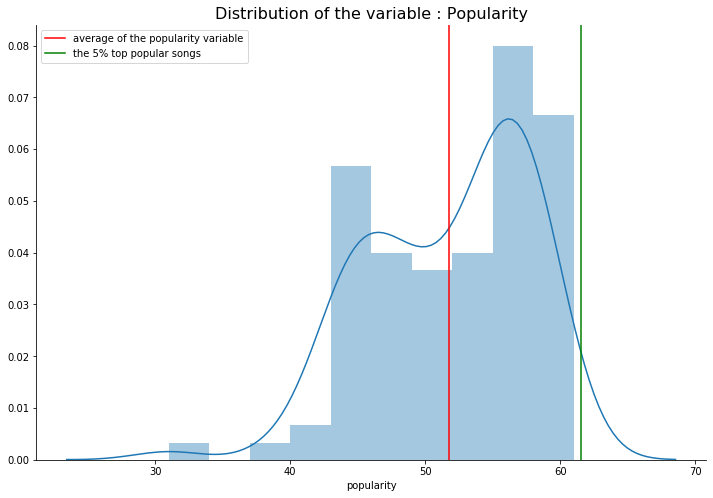

In [58]:
plt.figure(figsize = (12,8))
sns.distplot(data_lofi['popularity'],bins = 10)
plt.title('Distribution of the variable : Popularity',fontsize = 16)
plt.axvline(x = average_popularity , color = 'red',label = 'average of the popularity variable')
plt.axvline(x = average_popularity + 1.64 * std_deviation , label = 'the 5% top popular songs',color = 'green')
plt.legend()
sns.despine()

In [59]:
#We can cut the popularity variable into 4 group ! or let's have more fun first

In [60]:
std_deviation = np.sqrt(data_lofi.popularity.var())

In [61]:
#what makes a lo-fi track really popular ? 

In [62]:
(data_lofi
 .sort_values(by = 'popularity',ascending = False)
 
)

,artist_name,track_name,date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
99,Snuggles,Dancing in the Moonlight,2020-11-25T01:56:30Z,61,0.605,0.3360,9,-13.519,1,0.0332,0.953000,0.936000,0.1010,0.4680,180.102,94551
19,Wun Two,Lasagne,2020-11-25T01:56:30Z,61,0.550,0.4410,6,-12.384,0,0.1440,0.482000,0.734000,0.1700,0.9630,145.886,106490
31,Crate Diggers,Smokey,2020-11-25T01:56:30Z,60,0.767,0.2240,4,-11.050,1,0.0528,0.684000,0.929000,0.1090,0.9470,128.048,90000
29,Sense,Resolution,2020-11-25T01:56:30Z,59,0.654,0.4200,4,-11.375,1,0.0683,0.749000,0.667000,0.1030,0.1380,82.026,167561
28,PawnShop Guy,Sabrina,2020-11-25T01:56:30Z,59,0.833,0.1770,1,-19.641,0,0.0965,0.397000,0.942000,0.0823,0.1200,139.979,99429
93,Ganzo,Happy Feet,2020-11-25T01:56:30Z,59,0.800,0.5690,4,-10.784,0,0.3750,0.570000,0.000549,0.2020,0.7890,168.264,142015
69,Chancla,Homem,2020-11-25T01:56:30Z,59,0.745,0.4070,10,-11.328,0,0.2300,0.447000,0.644000,0.1800,0.4820,86.989,137931
38,lokeyz,espresso time,2020-11-25T01:56:30Z,59,0.646,0.4210,8,-10.564,1,0.0562,0.678000,0.891000,0.1640,0.4120,101.090,123726
44,_tag,Miffing,2020-11-25T01:56:30Z,59,0.705,0.2210,3,-11.474,0,0.0837,0.938000,0.906000,0.1110,0.3840,84.962,143131
42,Sidual.,Sway,2020-11-25T01:56:30Z,59,0.456,0.1840,5,-10.367,0,0.2880,0.865000,0.864000,0.1370,0.7100,143.879,148856


In [63]:
popularity_quartiles = pd.qcut(data_lofi.popularity,4)

In [64]:
pop_df = pd.DataFrame({
    'pop_bins' : popularity_quartiles
})

In [65]:
data_lofi_bins = data_lofi.join(pop_df)

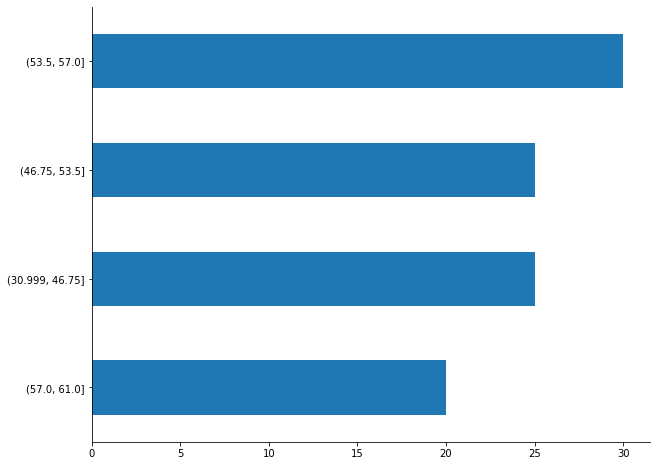

In [66]:
plt.figure(figsize = (10,8))
(data_lofi_bins
 .pop_bins
 .value_counts(ascending = True)
 .plot.barh()
)
sns.despine()

In [67]:

data_grouped = (data_lofi_bins
 .groupby('pop_bins')
 .mean()
 .drop('popularity',axis =1)
)


In [68]:
data_grouped = data_grouped.reset_index()

In [69]:
data_grouped.pop_bins.astype('str').values

array(['(30.999, 46.75]', '(46.75, 53.5]', '(53.5, 57.0]', '(57.0, 61.0]'],
      dtype=object)

In [70]:
data_grouped.pop_bins

0    (30.999, 46.75]
1      (46.75, 53.5]
2       (53.5, 57.0]
3       (57.0, 61.0]
Name: pop_bins, dtype: category
Categories (4, interval[float64]): [(30.999, 46.75] < (46.75, 53.5] < (53.5, 57.0] < (57.0, 61.0]]

In [71]:
def facet_factor(df,numeric_var,factor_var):
    liste = df.loc[:,[numeric_var,factor_var]].sort_values(by = numeric_var,ascending = False)[factor_var]
    return liste

In [72]:
facet_factor(data_grouped,'mode','pop_bins')

3       (57.0, 61.0]
2       (53.5, 57.0]
0    (30.999, 46.75]
1      (46.75, 53.5]
Name: pop_bins, dtype: category
Categories (4, interval[float64]): [(30.999, 46.75] < (46.75, 53.5] < (53.5, 57.0] < (57.0, 61.0]]

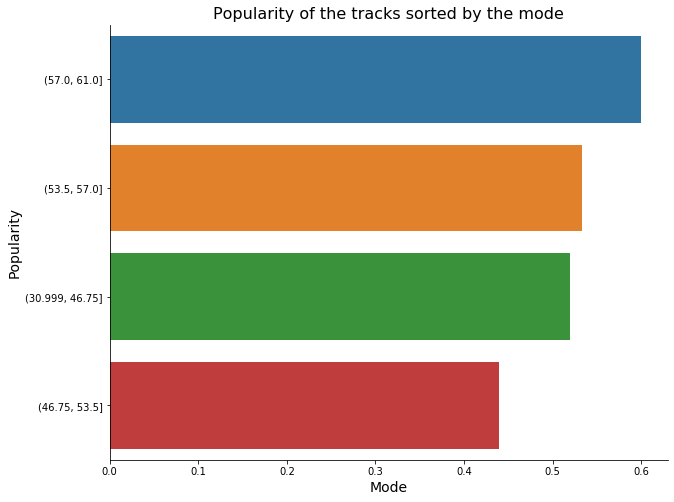

In [73]:

plt.figure(figsize = (10,8))
sns.barplot(y = 'pop_bins',x = 'mode'  ,data =data_grouped, order = facet_factor(data_grouped,'mode','pop_bins') )
plt.xlabel('Mode',fontsize = 14)
plt.ylabel('Popularity',fontsize = 14)
plt.title('Popularity of the tracks sorted by the mode', fontsize = 16)
sns.despine()

In [74]:
data_grouped.loc[data_grouped['mode'].sort_values(ascending = False).tolist() == data_grouped.pop_bins]

,pop_bins,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms


In [75]:
 data_grouped.loc[:,['mode','pop_bins']].sort_values(by = 'mode',ascending = False)['pop_bins']

3       (57.0, 61.0]
2       (53.5, 57.0]
0    (30.999, 46.75]
1      (46.75, 53.5]
Name: pop_bins, dtype: category
Categories (4, interval[float64]): [(30.999, 46.75] < (46.75, 53.5] < (53.5, 57.0] < (57.0, 61.0]]

In [76]:
data_grouped

,pop_bins,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,"(30.999, 46.75]",0.63644,0.375520,4.720000,-11.85644,0.520000,0.069760,0.536030,0.807240,0.133876,0.346040,104.053840,141428.880000
1,"(46.75, 53.5]",0.73512,0.359196,4.280000,-12.74624,0.440000,0.146856,0.490179,0.765414,0.165628,0.396144,116.718000,137345.280000
2,"(53.5, 57.0]",0.66920,0.334033,4.866667,-11.72500,0.533333,0.144427,0.574241,0.716512,0.153290,0.378233,108.845067,125994.566667
3,"(57.0, 61.0]",0.67910,0.330850,5.350000,-12.47040,0.600000,0.126860,0.663000,0.725592,0.126400,0.449865,121.048450,121839.950000


In [77]:
data_grouped

,pop_bins,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,"(30.999, 46.75]",0.63644,0.375520,4.720000,-11.85644,0.520000,0.069760,0.536030,0.807240,0.133876,0.346040,104.053840,141428.880000
1,"(46.75, 53.5]",0.73512,0.359196,4.280000,-12.74624,0.440000,0.146856,0.490179,0.765414,0.165628,0.396144,116.718000,137345.280000
2,"(53.5, 57.0]",0.66920,0.334033,4.866667,-11.72500,0.533333,0.144427,0.574241,0.716512,0.153290,0.378233,108.845067,125994.566667
3,"(57.0, 61.0]",0.67910,0.330850,5.350000,-12.47040,0.600000,0.126860,0.663000,0.725592,0.126400,0.449865,121.048450,121839.950000


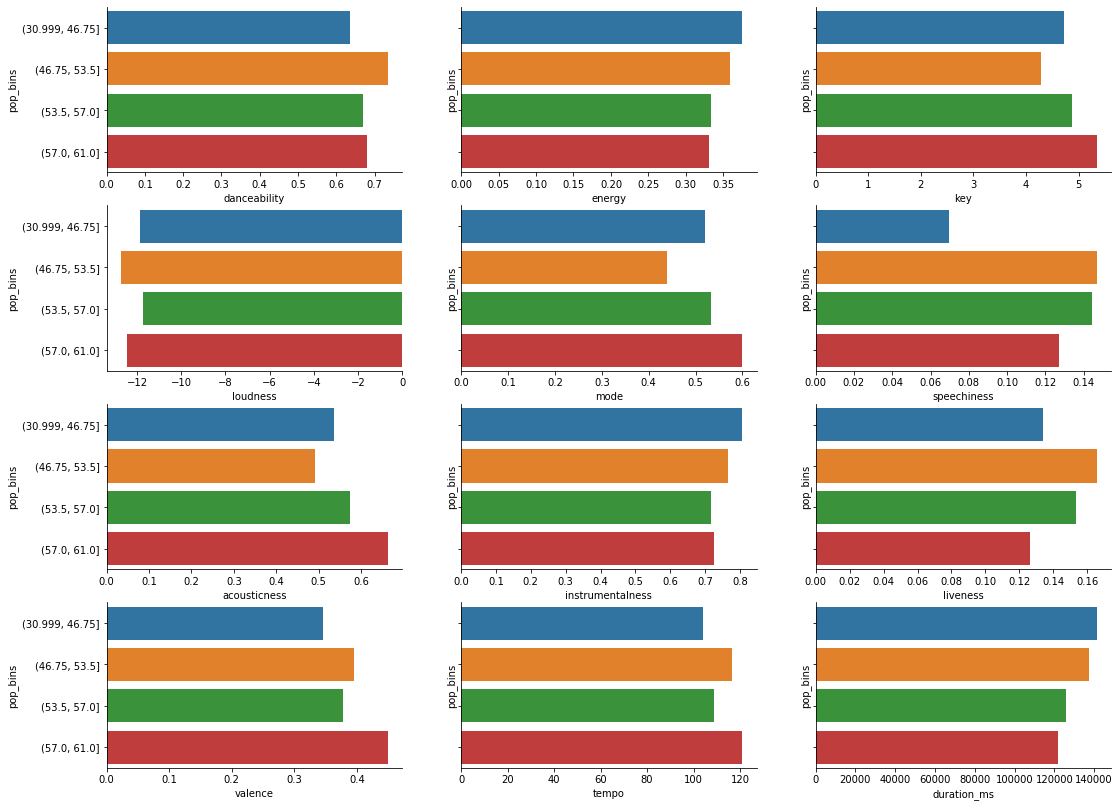

In [78]:
fig, ax = plt.subplots(4,3,sharey = True,squeeze = False,figsize = (18,14))
t = 0
for i in range(4):
    for j in range(3):
        t +=1
        sns.barplot(x = data_grouped.iloc[:,t] , y = data_grouped['pop_bins'],
                    ax = ax[i,j])
sns.despine()

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lin_reg = LinearRegression()

In [81]:
X = data_lofi_bins.loc[:,'danceability':'duration_ms']

In [82]:
y = data_lofi_bins.loc[:,'popularity']

In [83]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
coef_reg = lin_reg.coef_.tolist()

In [85]:
list_var =X.columns.tolist()

In [86]:
df_coef = pd.DataFrame({
    'variable':list_var,
    'coefficient':coef_reg
})

In [87]:
df_coef #should have standarized

,variable,coefficient
0,danceability,2.703644
1,energy,-8.526620
2,key,0.111885
3,loudness,0.083147
4,mode,1.070334
5,speechiness,13.335947
6,acousticness,5.127326
7,instrumentalness,-4.808470
8,liveness,1.711902
9,valence,1.830723


In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler_min = MinMaxScaler()

In [90]:
X_transformed = scaler_min.fit_transform(X)

In [91]:
lin_reg.fit(X_transformed,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
coef_reg_tr = lin_reg.coef_.tolist()

In [93]:
df_coef_transformed = pd.DataFrame({
    'variable':list_var,
    'coefficient':coef_reg_tr
})

In [94]:
df_coef_transformed

,variable,coefficient
0,danceability,1.519448
1,energy,-6.975628
2,key,1.230740
3,loudness,1.461885
4,mode,1.070334
5,speechiness,8.260286
6,acousticness,4.959380
7,instrumentalness,-4.687784
8,liveness,1.107772
9,valence,1.694883


In [95]:
#We didn't see that speechiness was that important in the dataset , let's check again

In [96]:
data_grouped

,pop_bins,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,"(30.999, 46.75]",0.63644,0.375520,4.720000,-11.85644,0.520000,0.069760,0.536030,0.807240,0.133876,0.346040,104.053840,141428.880000
1,"(46.75, 53.5]",0.73512,0.359196,4.280000,-12.74624,0.440000,0.146856,0.490179,0.765414,0.165628,0.396144,116.718000,137345.280000
2,"(53.5, 57.0]",0.66920,0.334033,4.866667,-11.72500,0.533333,0.144427,0.574241,0.716512,0.153290,0.378233,108.845067,125994.566667
3,"(57.0, 61.0]",0.67910,0.330850,5.350000,-12.47040,0.600000,0.126860,0.663000,0.725592,0.126400,0.449865,121.048450,121839.950000


In [97]:
X.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
danceability,1.000000,0.101077,-0.198587,0.152762,-0.064654,0.280605,-0.237240,-0.072451,-0.139079,0.334362,0.028041,0.010393
energy,0.101077,1.000000,0.027692,0.539171,0.079222,0.148788,-0.218013,-0.195529,0.363759,0.298229,0.010028,0.119701
key,-0.198587,0.027692,1.000000,0.027981,-0.177532,0.038615,0.096490,-0.274658,-0.063040,-0.096295,-0.146220,0.032311
loudness,0.152762,0.539171,0.027981,1.000000,0.000861,0.173997,-0.226278,-0.136667,0.142407,0.394077,-0.158168,0.066656
mode,-0.064654,0.079222,-0.177532,0.000861,1.000000,-0.189810,0.113583,0.091124,0.135683,0.092255,-0.017666,-0.049321
speechiness,0.280605,0.148788,0.038615,0.173997,-0.189810,1.000000,-0.152334,-0.136093,0.031000,0.327900,0.038986,0.097852
acousticness,-0.237240,-0.218013,0.096490,-0.226278,0.113583,-0.152334,1.000000,0.261921,0.037581,-0.144384,-0.063327,0.087841
instrumentalness,-0.072451,-0.195529,-0.274658,-0.136667,0.091124,-0.136093,0.261921,1.000000,-0.009192,-0.052866,0.057327,-0.112585
liveness,-0.139079,0.363759,-0.063040,0.142407,0.135683,0.031000,0.037581,-0.009192,1.000000,0.032893,0.105771,-0.095758
valence,0.334362,0.298229,-0.096295,0.394077,0.092255,0.327900,-0.144384,-0.052866,0.032893,1.000000,0.120671,-0.049814


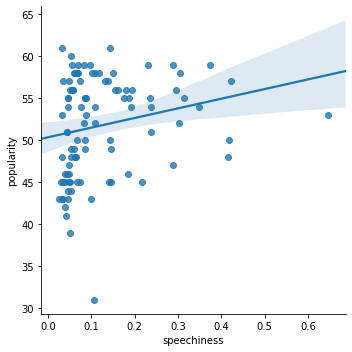

In [98]:
sns.lmplot(x = 'speechiness', y = 'popularity' , data = data_lofi)
sns.despine()

In [99]:
from sklearn.linear_model import Lasso

In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [101]:
lasso_reg = Lasso(alpha = 0.1)

In [102]:
lasso_reg.fit(X_transformed,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [103]:
lasso_reg.coef_

array([ 0.        , -2.3514596 ,  0.14788552, -0.        ,  0.29343884,
        5.00260245,  3.23576256, -2.47489781,  0.        ,  0.7256052 ,
        1.40573842, -5.34891562])

In [104]:
params_grid = [
    {'alpha' : np.arange(0,0.1,0.01)}
]

In [105]:
grid_search = GridSearchCV(lasso_reg,params_grid,scoring = 'neg_mean_squared_error',
                          cv = 5,return_train_score = True)

In [106]:
grid_search.fit(X_transformed,y)

C:\Users\Alaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alaa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Alaa\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663.8440745949351, tolerance: 0.19362000000000001
  positive)
C:\Users\Alaa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alaa\Anac

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [107]:
grid_search.best_params_

{'alpha': 0.09}

In [108]:
final_lasso_model = grid_search.best_estimator_

In [109]:
f_coef_lasso = final_lasso_model.coef_

In [110]:
coef_final = pd.DataFrame({
    'variable' : list_var,
    'coef' : f_coef_lasso
})

In [111]:
coef_final

,variable,coef
0,danceability,0.000000
1,energy,-2.712568
2,key,0.235463
3,loudness,-0.000000
4,mode,0.367616
5,speechiness,5.361685
6,acousticness,3.392653
7,instrumentalness,-2.700799
8,liveness,0.000000
9,valence,0.876374


In [112]:
data_lofi_bins.groupby('pop_bins').median().speechiness

pop_bins
(30.999, 46.75]    0.0477
(46.75, 53.5]      0.0840
(53.5, 57.0]       0.1200
(57.0, 61.0]       0.0901
Name: speechiness, dtype: float64

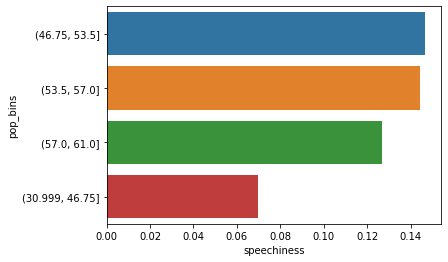

In [113]:
sns.barplot(x = 'speechiness',y = 'pop_bins',data = data_grouped, order = facet_factor(data_grouped,'speechiness','pop_bins'))

In [114]:
#Let's have some more fun , going tod divide the data in subgroups then, apply some machine learning techinques and see which perform best

In [115]:
data_lofi

,artist_name,track_name,date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Lehiotik,Prey,2020-11-25T01:56:30Z,56,0.417,0.1840,9,-13.227,0,0.0579,0.910000,0.865000,0.1510,0.0372,119.832,86125
1,aesvec.,I Don't Care,2020-11-25T01:56:30Z,57,0.710,0.1930,0,-16.519,0,0.0747,0.665000,0.846000,0.1150,0.1520,80.062,121510
2,braj mahal,Crush,2020-11-25T01:56:30Z,56,0.841,0.4290,5,-6.940,1,0.1610,0.505000,0.545000,0.2210,0.7240,79.022,109367
3,ocha,Wish We Could Stay Like This Forever,2020-11-25T01:56:30Z,45,0.658,0.3350,4,-14.835,1,0.2180,0.741000,0.872000,0.1330,0.4660,79.895,168000
4,Peter Kind,Sweet Hangover,2020-11-25T01:56:30Z,58,0.742,0.3340,1,-9.704,0,0.0680,0.418000,0.019300,0.1050,0.6150,80.008,112714
5,Tohaj,Mindfulness,2020-11-25T01:56:30Z,42,0.638,0.3800,2,-9.160,0,0.0405,0.740000,0.797000,0.0984,0.3110,79.209,169625
6,Dualizm,Going Home,2020-11-25T01:56:30Z,39,0.746,0.3140,1,-11.632,1,0.0518,0.843000,0.927000,0.0814,0.3340,85.038,144000
7,twuan,Chillin',2020-11-25T01:56:30Z,48,0.642,0.1970,4,-14.052,0,0.0540,0.435000,0.823000,0.1110,0.2480,152.039,77241
8,Saib,City Lounge,2020-11-25T01:56:30Z,56,0.807,0.5760,4,-10.158,0,0.2960,0.041900,0.931000,0.1160,0.7710,169.999,158118
9,Simple Lo-Fi,Mi Sento Bene,2020-11-25T01:56:30Z,43,0.595,0.3260,9,-14.338,0,0.0321,0.968000,0.951000,0.0926,0.0933,79.948,118875


In [121]:
pd.qcut(data_lofi['popularity'],3)

0       (49.0, 56.0]
1       (56.0, 61.0]
2       (49.0, 56.0]
3     (30.999, 49.0]
4       (56.0, 61.0]
5     (30.999, 49.0]
6     (30.999, 49.0]
7     (30.999, 49.0]
8       (49.0, 56.0]
9     (30.999, 49.0]
10    (30.999, 49.0]
11    (30.999, 49.0]
12    (30.999, 49.0]
13    (30.999, 49.0]
14    (30.999, 49.0]
15    (30.999, 49.0]
16    (30.999, 49.0]
17    (30.999, 49.0]
18    (30.999, 49.0]
19      (56.0, 61.0]
20    (30.999, 49.0]
21      (56.0, 61.0]
22      (49.0, 56.0]
23    (30.999, 49.0]
24      (49.0, 56.0]
25      (56.0, 61.0]
26      (49.0, 56.0]
27    (30.999, 49.0]
28      (56.0, 61.0]
29      (56.0, 61.0]
30    (30.999, 49.0]
31      (56.0, 61.0]
32      (49.0, 56.0]
33      (56.0, 61.0]
34      (49.0, 56.0]
35      (49.0, 56.0]
36      (56.0, 61.0]
37    (30.999, 49.0]
38      (56.0, 61.0]
39      (49.0, 56.0]
40      (56.0, 61.0]
41    (30.999, 49.0]
42      (56.0, 61.0]
43    (30.999, 49.0]
44      (56.0, 61.0]
45    (30.999, 49.0]
46      (56.0, 61.0]
47      (56.0

In [123]:
data_lofi.describe()['popularity']

count    100.000000
mean      51.760000
std        5.966438
min       31.000000
25%       46.750000
50%       53.500000
75%       57.000000
max       61.000000
Name: popularity, dtype: float64

In [124]:
data_lofi.popularity.median()

53.5

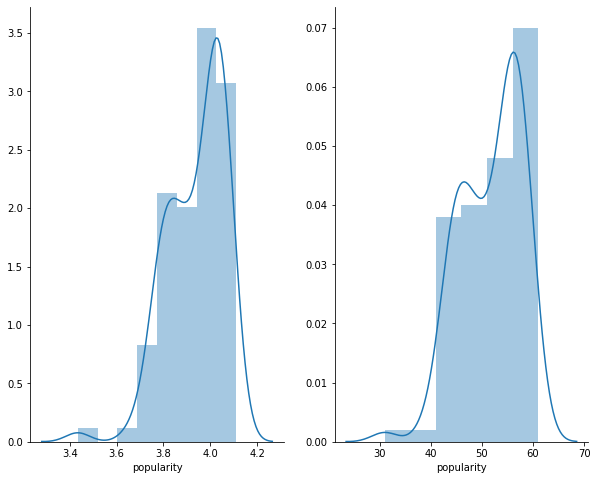

In [151]:
fig, ax = plt.subplots(1,2,figsize = (10,8),sharex = False,squeeze = False)
sns.distplot(data_lofi['popularity'],bins = 6, ax= ax[0,1])
sns.distplot(np.log(data_lofi['popularity']) ,ax= ax[0,0])

sns.despine()

In [ ]:
#The question is how should I cut the popularity variable ? It will influence my analysis 

In [155]:
bins_pop = pd.qcut(data_lofi.popularity, 3)

In [163]:
bins_pop.name = 'pop_bins'

In [164]:
bins_lofi = data_lofi.join(pd.DataFrame(bins_pop))

In [165]:
bins_lofi

,artist_name,track_name,date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,pop_bins
0,Lehiotik,Prey,2020-11-25T01:56:30Z,56,0.417,0.1840,9,-13.227,0,0.0579,0.910000,0.865000,0.1510,0.0372,119.832,86125,"(49.0, 56.0]"
1,aesvec.,I Don't Care,2020-11-25T01:56:30Z,57,0.710,0.1930,0,-16.519,0,0.0747,0.665000,0.846000,0.1150,0.1520,80.062,121510,"(56.0, 61.0]"
2,braj mahal,Crush,2020-11-25T01:56:30Z,56,0.841,0.4290,5,-6.940,1,0.1610,0.505000,0.545000,0.2210,0.7240,79.022,109367,"(49.0, 56.0]"
3,ocha,Wish We Could Stay Like This Forever,2020-11-25T01:56:30Z,45,0.658,0.3350,4,-14.835,1,0.2180,0.741000,0.872000,0.1330,0.4660,79.895,168000,"(30.999, 49.0]"
4,Peter Kind,Sweet Hangover,2020-11-25T01:56:30Z,58,0.742,0.3340,1,-9.704,0,0.0680,0.418000,0.019300,0.1050,0.6150,80.008,112714,"(56.0, 61.0]"
5,Tohaj,Mindfulness,2020-11-25T01:56:30Z,42,0.638,0.3800,2,-9.160,0,0.0405,0.740000,0.797000,0.0984,0.3110,79.209,169625,"(30.999, 49.0]"
6,Dualizm,Going Home,2020-11-25T01:56:30Z,39,0.746,0.3140,1,-11.632,1,0.0518,0.843000,0.927000,0.0814,0.3340,85.038,144000,"(30.999, 49.0]"
7,twuan,Chillin',2020-11-25T01:56:30Z,48,0.642,0.1970,4,-14.052,0,0.0540,0.435000,0.823000,0.1110,0.2480,152.039,77241,"(30.999, 49.0]"
8,Saib,City Lounge,2020-11-25T01:56:30Z,56,0.807,0.5760,4,-10.158,0,0.2960,0.041900,0.931000,0.1160,0.7710,169.999,158118,"(49.0, 56.0]"
9,Simple Lo-Fi,Mi Sento Bene,2020-11-25T01:56:30Z,43,0.595,0.3260,9,-14.338,0,0.0321,0.968000,0.951000,0.0926,0.0933,79.948,118875,"(30.999, 49.0]"


In [168]:
from sklearn.model_selection import StratifiedShuffleSplit

In [175]:
splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2 ,random_state = 129)

In [180]:
for train_index,test_index in splitter.split(bins_lofi,bins_lofi.pop_bins) : 
    strat_train = bins_lofi.loc[train_index]
    strat_test = bins_lofi.loc[test_index]

In [184]:
#Let's check 

In [186]:
bins_lofi.pop_bins.value_counts()/len(bins_lofi)

(49.0, 56.0]      0.37
(30.999, 49.0]    0.37
(56.0, 61.0]      0.26
Name: pop_bins, dtype: float64

In [190]:
strat_train.pop_bins.value_counts()/len(strat_train) #work perfecttly

(30.999, 49.0]    0.3750
(49.0, 56.0]      0.3625
(56.0, 61.0]      0.2625
Name: pop_bins, dtype: float64

In [191]:
for df in (strat_train,strat_test):
    df.drop('pop_bins', axis = 1 , inplace = True)

In [192]:
#We are going to use five alogirthm : LinearRe,Ridge,Lasso,Knn,randomForest

In [207]:
X = strat_train.loc[:,'danceability':'duration_ms']

In [208]:
y = strat_train.loc[:,'popularity']

In [194]:
from sklearn.preprocessing import MinMaxScaler

In [196]:
min_scaler = MinMaxScaler()

In [212]:
X_scaled = min_scaler.fit_transform(X)

In [216]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [214]:
from sklearn.model_selection import cross_val_score

In [349]:
lin_reg = LinearRegression()
lasso_reg = Lasso(alpha = 0.05)
ridge_reg = Ridge(alpha = 2)

In [350]:
estimators = [lin_reg,lasso_reg,ridge_reg]

In [351]:
results = []
for estimator in estimators:
    result = cross_val_score(estimator,X_scaled,y,cv = 4 , scoring = 'neg_mean_squared_error')
    results.append(result)

In [352]:
error_r = np.sqrt([i * (-1) for i in results])

In [353]:
error_m = np.mean(error_r,axis = 1)

In [354]:
error_m

array([5.93492207, 5.70758279, 5.64037493])

In [355]:
lin_coef,lasso_coef,ridge_coef = [], [] , []
coefs = []
for reg in (lin_reg,lasso_reg,ridge_reg):
    reg.fit(X_scaled,y)
    coefs.append(reg.coef_)

In [356]:
lin_coef = coefs[0]
lasso_coef = coefs[1]
ridge_coef = coefs[2]

In [357]:
lin_coef

array([ 1.03464839, -2.52072835,  0.46488813,  0.06968998,  1.92590316,
        9.77816732,  3.68875456, -4.8061221 , -0.30591526,  0.0672282 ,
        3.07188581, -7.89486808])

In [358]:
#Let's compare the linear models

In [359]:
pd.DataFrame({
    'variable':X.columns,
    'lin_coef': lin_coef,
    'lasso_coef': lasso_coef,
    'ridge_coef' : ridge_coef
})

,variable,lin_coef,lasso_coef,ridge_coef
0,danceability,1.034648,0.000000,1.248665
1,energy,-2.520728,-1.005215,-1.425122
2,key,0.464888,0.000000,0.946974
3,loudness,0.069690,-0.000000,-0.701139
4,mode,1.925903,1.529221,1.406419
5,speechiness,9.778167,8.078846,4.719191
6,acousticness,3.688755,2.779391,2.268713
7,instrumentalness,-4.806122,-3.828873,-3.104089
8,liveness,-0.305915,-0.000000,0.284507
9,valence,0.067228,0.000000,0.945837


In [360]:
lasso_reg.fit(X_scaled,y)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [361]:
strat_test

,artist_name,track_name,date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
89,p!ke,whoop,2020-11-25T01:56:30Z,56,0.697,0.5130,4,-13.551,1,0.0585,0.72200,0.835,0.1490,0.290,85.019,129853
44,_tag,Miffing,2020-11-25T01:56:30Z,59,0.705,0.2210,3,-11.474,0,0.0837,0.93800,0.906,0.1110,0.384,84.962,143131
69,Chancla,Homem,2020-11-25T01:56:30Z,59,0.745,0.4070,10,-11.328,0,0.2300,0.44700,0.644,0.1800,0.482,86.989,137931
49,ROOM7,Window Camping,2020-11-25T01:56:30Z,57,0.716,0.4740,0,-10.607,1,0.1310,0.48800,0.458,0.1170,0.706,159.993,123000
36,sonolon,my sound,2020-11-25T01:56:30Z,57,0.528,0.2890,0,-13.909,1,0.4220,0.38000,0.760,0.1440,0.403,81.059,96000
18,Sitting Duck,Tea & Paper,2020-11-25T01:56:30Z,49,0.550,0.2910,6,-19.609,0,0.0524,0.86800,0.958,0.1030,0.108,79.012,133671
65,vibe academy,ballpoint,2020-11-25T01:56:30Z,56,0.751,0.2370,8,-10.361,1,0.0558,0.89000,0.936,0.0990,0.518,84.987,108000
3,ocha,Wish We Could Stay Like This Forever,2020-11-25T01:56:30Z,45,0.658,0.3350,4,-14.835,1,0.2180,0.74100,0.872,0.1330,0.466,79.895,168000
64,really big mountains,st. mark’s place,2020-11-25T01:56:30Z,54,0.561,0.2830,2,-15.499,1,0.1090,0.90400,0.927,0.1210,0.332,176.006,122898
50,eau n!ce,Three,2020-11-25T01:56:30Z,49,0.820,0.2210,5,-10.357,0,0.1460,0.86800,0.719,0.1070,0.464,150.136,130301


In [362]:
X_test = min_scaler.fit_transform(strat_test.loc[:,'danceability':'duration_ms'])

In [363]:
y_test = strat_test.loc[:,'popularity']

In [364]:
from sklearn.metrics import mean_squared_error

In [365]:
pred_lin  = lin_reg.predict(X_test)
pred_lasso = lasso_reg.predict(X_test)
pred_ridge = ridge_reg.predict(X_test)

In [366]:
error_lin = mean_squared_error(y_test,pred_lin)
error_lasso = mean_squared_error(y_test,pred_lasso)
error_ridge = mean_squared_error(y_test,pred_ridge)

In [367]:
print(error_lin,error_lasso,error_ridge)

39.7994337133354 40.759504813939564 37.59465382617378


In [368]:
pd.DataFrame({
    'y_true':y_test,
    'pred_lin':pred_lin,
    'pred_lasso':pred_lasso,
    'pred_ridge':pred_ridge
})

,y_true,pred_lin,pred_lasso,pred_ridge
89,56,50.136143,50.835706,51.027389
44,59,49.227805,49.591221,49.958006
69,59,53.680890,53.345554,53.227376
49,57,57.393345,56.734362,55.877538
36,57,61.037792,60.260457,55.915113
18,49,47.401278,48.617287,48.812051
65,56,52.687006,52.105079,52.819140
3,45,51.804610,51.991719,51.748741
64,54,54.522309,54.541595,53.670743
50,49,55.543231,54.361559,54.442696


In [371]:
from sklearn.ensemble import RandomForestRegressor

In [372]:
forest_reg = RandomForestRegressor()

In [374]:
forest_reg.fit(X_scaled,y)

C:\Users\Alaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [438]:
pred_forest = forest_reg.predict(X_test)

In [439]:
error_forest = mean_squared_error(y_test,pred_forest)

In [440]:
error_forest

34.50138888888888

In [378]:
#Can we tune the model ? 

In [520]:
from sklearn.model_selection import GridSearchCV

In [521]:
X_scaled.shape

(80, 12)

In [532]:
grid_forest = [
    {'n_estimators':[5,10,15,16,17,18,20,21]}
]

In [542]:
grid_action = GridSearchCV(forest_reg,grid_forest,scoring = 'neg_mean_squared_error',
                          cv = 10)

In [543]:
grid_action.fit(X_scaled,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'n_estimators': [5, 10, 15, 16, 1

In [544]:
grid_action.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [545]:
forest_final = grid_action.best_estimator_

In [546]:
pred_forest_final = forest_final.predict(X_test)

In [547]:
pred_forest_final

array([49.95      , 55.5       , 54.5       , 56.75      , 53.65      ,
       46.6       , 50.65      , 51.7       , 53.15      , 54.        ,
       54.75      , 49.9       , 46.75      , 51.73333333, 52.2       ,
       46.95      , 50.        , 51.55      , 54.45      , 50.5       ])

In [548]:
pred_forest

array([47.7       , 55.5       , 55.8       , 55.9       , 54.7       ,
       48.53333333, 48.7       , 54.1       , 56.2       , 52.5       ,
       53.4       , 50.3       , 47.7       , 53.9       , 48.6       ,
       47.1       , 50.1       , 51.7       , 55.6       , 51.4       ])

In [549]:
error_forest_final = mean_squared_error(y_test,pred_forest_final)

In [550]:
error_forest_final

32.88930555555556

In [552]:
predictions = pd.DataFrame({
    'y_true':y_test,
    'pred_lin':pred_lin,
    'pred_lasso':pred_lasso,
    'pred_ridge':pred_ridge,
    'pred_forest':pred_forest_final
})

In [553]:
predictions

,y_true,pred_lin,pred_lasso,pred_ridge,pred_forest
89,56,50.136143,50.835706,51.027389,49.950000
44,59,49.227805,49.591221,49.958006,55.500000
69,59,53.680890,53.345554,53.227376,54.500000
49,57,57.393345,56.734362,55.877538,56.750000
36,57,61.037792,60.260457,55.915113,53.650000
18,49,47.401278,48.617287,48.812051,46.600000
65,56,52.687006,52.105079,52.819140,50.650000
3,45,51.804610,51.991719,51.748741,51.700000
64,54,54.522309,54.541595,53.670743,53.150000
50,49,55.543231,54.361559,54.442696,54.000000


In [571]:
mean_res = predictions.iloc[:,3:5].mean(axis = 1)

In [572]:
mean_squared_error(y_test,mean_res)

34.085320882640346

In [575]:
features_importance = grid_action.best_estimator_.feature_importances_

In [659]:
features_importance

array([0.07054628, 0.02939571, 0.03729467, 0.06085854, 0.01625895,
       0.28690728, 0.07641759, 0.07499092, 0.05409093, 0.06243538,
       0.11895082, 0.11185292])

In [660]:
df_imp = pd.DataFrame(dict(sorted(zip(X.columns,features_importance),reverse = True)),index = pd.RangeIndex(0,len(features_importance)))

In [661]:
df_imp =(df_imp
 .melt(value_name = 'importance')
 .drop_duplicates('variable')
 .sort_values('importance',ascending = False)
 .set_index(pd.RangeIndex(0,12))

)


In [662]:
df_imp

,variable,importance
0,speechiness,0.286907
1,tempo,0.118951
2,duration_ms,0.111853
3,acousticness,0.076418
4,instrumentalness,0.074991
5,danceability,0.070546
6,valence,0.062435
7,loudness,0.060859
8,liveness,0.054091
9,key,0.037295


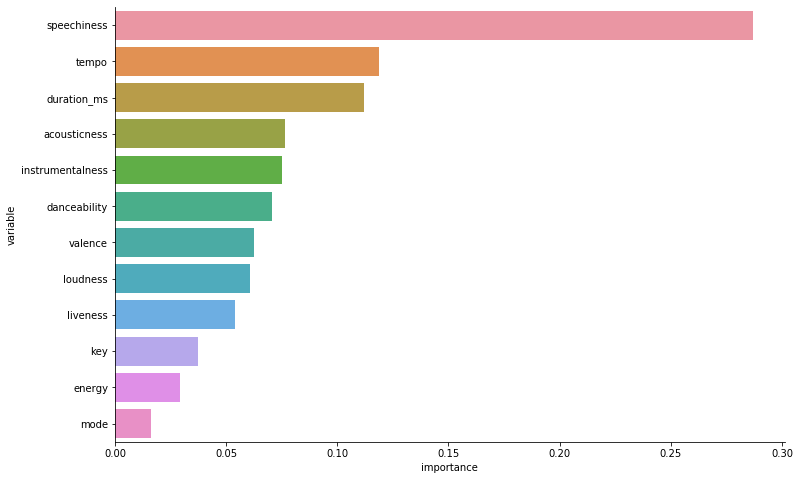

In [666]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'importance' ,y = 'variable',data = df_imp)
sns.despine()

In [664]:
df_imp

,variable,importance
0,speechiness,0.286907
1,tempo,0.118951
2,duration_ms,0.111853
3,acousticness,0.076418
4,instrumentalness,0.074991
5,danceability,0.070546
6,valence,0.062435
7,loudness,0.060859
8,liveness,0.054091
9,key,0.037295


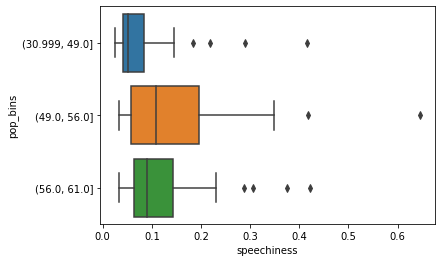

In [680]:
sns.boxplot('speechiness','pop_bins',data = bins_lofi)

In [687]:
(bins_lofi
 .loc[:,['artist_name','track_name','popularity']]
 .sort_values('popularity',ascending = False)
)

,artist_name,track_name,popularity
99,Snuggles,Dancing in the Moonlight,61
19,Wun Two,Lasagne,61
31,Crate Diggers,Smokey,60
29,Sense,Resolution,59
28,PawnShop Guy,Sabrina,59
93,Ganzo,Happy Feet,59
69,Chancla,Homem,59
38,lokeyz,espresso time,59
44,_tag,Miffing,59
42,Sidual.,Sway,59
